In [ ]:



import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/MyDrive/imdb_top_1000.csv'
df = pd.read_csv(file_path)
df.head()




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Məlumatların təmizlənməsi


In [ ]:
# 'Poster_Link' sütununu silirik (əgər varsa)
if "Poster_Link" in df.columns:
    df = df.drop("Poster_Link", axis=1)

# 'Not Available' olan illəri çıxardırıq
df = df[df["Released_Year"] != "Not Available"]


# Müddət sütunundakı " min" hissəsini çıxardırıq və ədədə çeviririk
df["Runtime"] = df["Runtime"].astype(str).str.replace(" min", "")
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce")



# Boş sertifikatları "Unknown" ilə əvəz edirik
df["Certificate"] = df["Certificate"].fillna("Unknown")

# Meta skor üçün boşluqları orta dəyərlə əvəz edirik
df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].mean())

# Gəlir üçün boşluqları median dəyərlə doldururuq
df["Gross"] = df["Gross"].fillna(df["Gross"].median())

# Əsas sütunlarda boş sətrləri silirik
df = df.dropna(subset=["Released_Year", "Runtime", "IMDB_Rating"])
df["Gross"] = df["Gross"].astype(str).str.replace(",", "", regex=False)
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")
df["Gross"] = df["Gross"].astype(int)


# EDA — İlkin Məlumat Analizi


# Rəqəmsal Sütunlar Arasında Korrelyasiya Matrisi

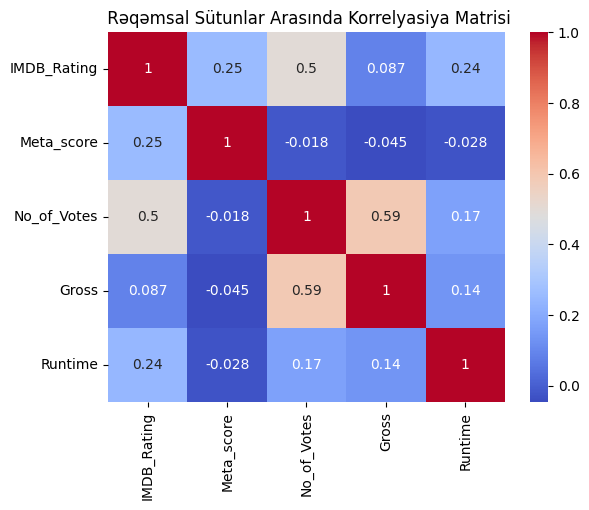

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df_clean[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross", "Runtime"]].corr(),
    annot=True, cmap='coolwarm'
)
plt.title(" Rəqəmsal Sütunlar Arasında Korrelyasiya Matrisi")
plt.show()


# IMDb Reytinqlərinin Paylanması

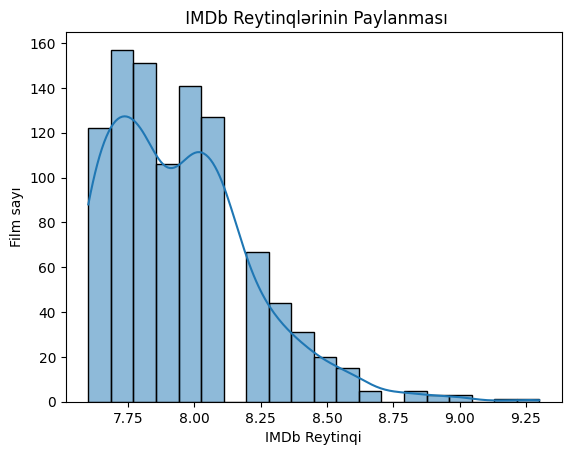

In [ ]:
sns.histplot(df_clean["IMDB_Rating"], bins=20, kde=True)
plt.title(" IMDb Reytinqlərinin Paylanması")
plt.xlabel("IMDb Reytinqi")
plt.ylabel("Film sayı")
plt.show()


# Ən Populyar 10 Janr

In [ ]:
import plotly.express as px
import pandas as pd

# Janrları parçalayırıq və ən çox rast gəlinən 10 janrı seçirik
top_genres = df_clean["Genre"].str.split(", ").explode().value_counts().head(10).reset_index()
top_genres.columns = ["Genre", "Count"]

# Interaktiv bar chart (rəngli və hover funksiyalı)
fig = px.bar(
    top_genres,
    x="Genre",
    y="Count",
    color="Count",
    color_continuous_scale="deep",  # Alternativlər: magma, viridis, plasma, turbo, cividis
    title="🎭 Ən Populyar 10 Janr"
)

# Qrafik parametrləri
fig.update_layout(
    template="plotly_white",
    title_font_size=20,
    xaxis_title="Janr",
    yaxis_title="Film sayı",
    xaxis_tickangle=-45
)

fig.show()



# 🎬 1. IMDb Reytinqlərinə görə Ən Yüksək 10 Film

In [ ]:
import plotly.express as px

top10_rating = df_clean.sort_values(by="IMDB_Rating", ascending=False).head(10)

fig = px.bar(
    top10_rating,
    x="IMDB_Rating",
    y="Series_Title",
    orientation="h",
    color="IMDB_Rating",
    color_continuous_scale="viridis",
    title="🌟 IMDb Reytinqinə görə TOP 10 Film",
    labels={"IMDB_Rating": "IMDb Reytinqi", "Series_Title": "Film"}
)

fig.update_layout(
    template="plotly_white",
    yaxis={"categoryorder": "total ascending"},
    title_font_size=20
)

fig.show()



# 🎬 Ən Çox Filmə Sahib 10 Rejissor

/tmp/ipython-input-25-1538661305.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




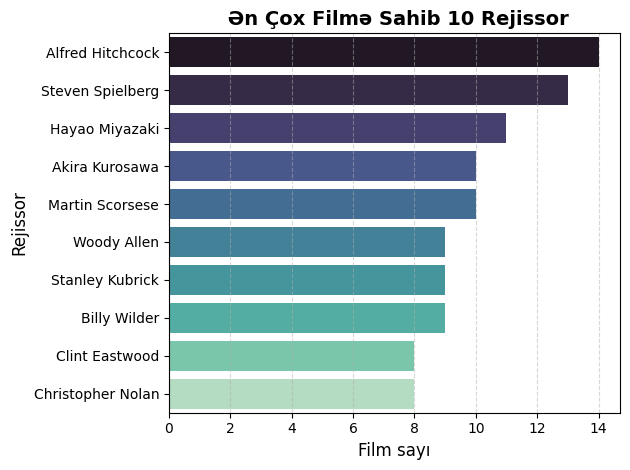

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rejissorların film sayı
top_directors = df_clean["Director"].value_counts().head(10)

# Rəng palitrası: "viridis", "mako", "rocket", "coolwarm" kimi modern seçimlər mümkündür
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    palette="mako"  # rəng palitrası burada dəyişdirilə bilər
)

plt.title(" Ən Çox Filmə Sahib 10 Rejissor", fontsize=14, fontweight='bold')
plt.xlabel("Film sayı", fontsize=12)
plt.ylabel("Rejissor", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Ən yüksək IMDb Reytinqinə sahib aktyorlar (Star1)

/tmp/ipython-input-26-611418713.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




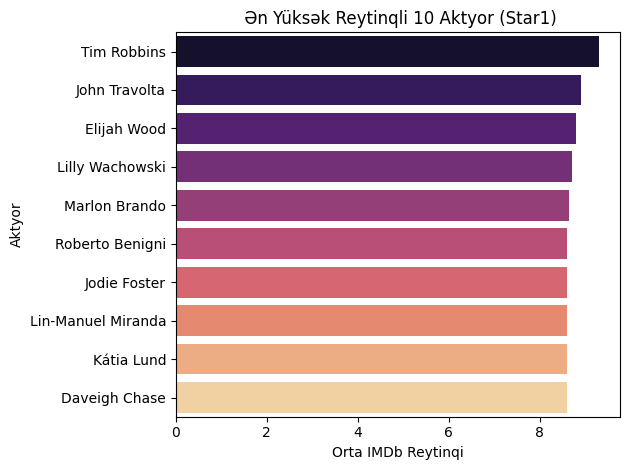

In [ ]:
top_actors_rating = df_clean.groupby("Star1")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_actors_rating.values, y=top_actors_rating.index, palette="magma")
plt.title(" Ən Yüksək Reytinqli 10 Aktyor (Star1)")
plt.xlabel("Orta IMDb Reytinqi")
plt.ylabel("Aktyor")
plt.tight_layout()
plt.show()

# İllərə görə film sayı

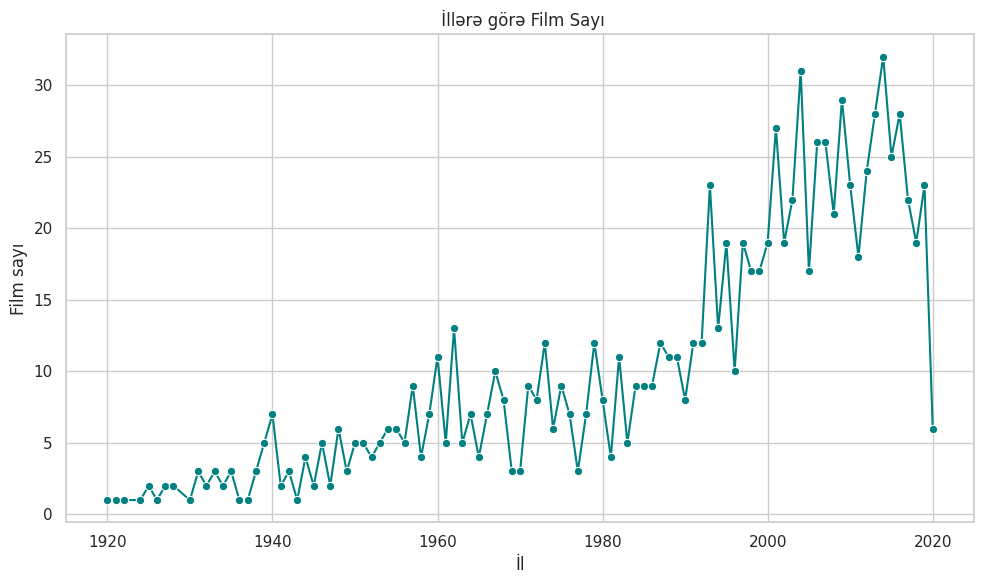

In [ ]:
year_counts = df_clean["Released_Year"].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", color="teal")
plt.title(" İllərə görə Film Sayı")
plt.xlabel("İl")
plt.ylabel("Film sayı")
plt.grid(True)
plt.tight_layout()
plt.show()

# Ən yüksək gəlirə sahib 10 film

/tmp/ipython-input-27-1266620089.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




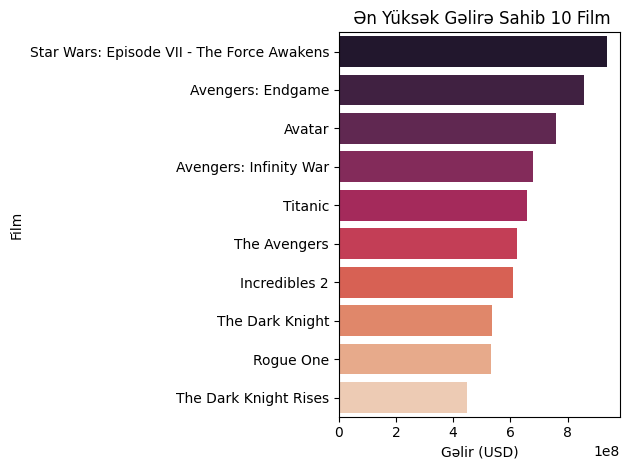

In [ ]:
top10_gross = df_clean.sort_values(by="Gross", ascending=False).head(10)
sns.barplot(x=top10_gross["Gross"], y=top10_gross["Series_Title"], palette="rocket")
plt.title(" Ən Yüksək Gəlirə Sahib 10 Film")
plt.xlabel("Gəlir (USD)")
plt.ylabel("Film")
plt.tight_layout()
plt.show()

# Janra görə orta gəlir (Gross)

/tmp/ipython-input-28-1462833539.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




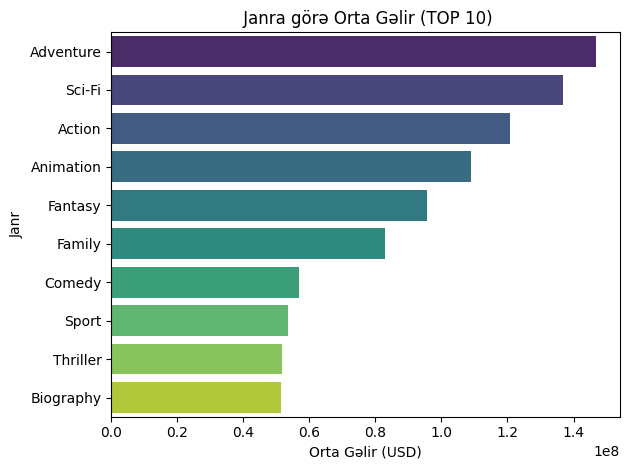

In [ ]:
genre_gross = df_clean.copy()
genre_gross["Genre"] = genre_gross["Genre"].str.split(", ")
genre_gross = genre_gross.explode("Genre")
genre_gross["Genre"] = genre_gross["Genre"].str.strip()
avg_gross_by_genre = genre_gross.groupby("Genre")["Gross"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, palette="viridis")
plt.title(" Janra görə Orta Gəlir (TOP 10)")
plt.xlabel("Orta Gəlir (USD)")
plt.ylabel("Janr")
plt.tight_layout()
plt.show()

zsx